<a href="https://colab.research.google.com/github/Alexamannn/NLP-Text-Mining-Prediction-to-get-Saracstic-reply-/blob/main/Text_mining_Sarcasm_Probility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexaman","key":"db5b94bbf62d6c54956a11bbf090315d"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -q danofer/sarcasm/
!unzip /content/sarcasm.zip

kaggle.json
Archive:  /content/sarcasm.zip
  inflating: test-balanced.csv       
  inflating: test-unbalanced.csv     
  inflating: train-balanced-sarc.csv.gz  
  inflating: train-balanced-sarcasm.csv  


In [ ]:
import pandas as pd
import re
data=pd.read_csv('/content/train-balanced-sarcasm.csv')
data=data[['parent_comment','subreddit','label']]

POS TAGGING
the Harvard IV-4 dictionary


In [ ]:
!pip install -q swifter
!pip install -q pysentiment2
import swifter
import nltk
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
import pysentiment2 as ps
from nltk.tokenize import word_tokenize

     |████████████████████████████████| 634kB 8.6MB/s 
     |████████████████████████████████| 296kB 13.8MB/s 
     |████████████████████████████████| 583kB 9.9MB/s 
     |████████████████████████████████| 112kB 27.3MB/s 
     |████████████████████████████████| 48.5MB 55kB/s 
     |████████████████████████████████| 17.2MB 209kB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
     |████████████████████████████████| 133kB 66.7MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 3.1MB 51.0MB/s 
     |████████████████████████████████| 204kB 63.1MB/s 
     |████████████████████████████████| 1.3MB 48.6MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 296kB 60.6MB/s 
     |████████████████████████████████| 143kB 60.0MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
ERROR: modin 0.9.1 has requirement pandas==1.2.3, but you'll have pandas 1.1.5 which is incompatible.
     |███

In [ ]:
hiv4 = ps.HIV4()

In [ ]:
def tags(x):
   text = word_tokenize(str(x))
   tags=nltk.pos_tag(text)
   score = hiv4.get_score(text)
   xx=[]
   xx.append(tags)
   return score,xx

In [ ]:
data['questionpos'] =data['parent_comment'].swifter.apply(lambda x :tags(x))

In [ ]:
data

,parent_comment,subreddit,label,questionpos
0,"Yeah, I get that argument. At this point, I'd ...",politics,0,"({'Positive': 1, 'Negative': 3, 'Polarity': -0..."
1,The blazers and Mavericks (The wests 5 and 6 s...,nba,0,"({'Positive': 1, 'Negative': 0, 'Polarity': 0...."
2,They're favored to win.,nfl,0,"({'Positive': 0, 'Negative': 0, 'Polarity': 0...."
3,deadass don't kill my buzz,BlackPeopleTwitter,0,"({'Positive': 0, 'Negative': 1, 'Polarity': -0..."
4,Yep can confirm I saw the tool they use for th...,MaddenUltimateTeam,0,"({'Positive': 1, 'Negative': 0, 'Polarity': 0...."
...,...,...,...,...
1010821,"No one is calling this an engineered pathogen,...",reddit.com,1,"({'Positive': 1, 'Negative': 0, 'Polarity': 0...."
1010822,In a move typical of their recent do-nothing a...,climate,1,"({'Positive': 1, 'Negative': 0, 'Polarity': 0...."
1010823,Screw the Disabled--I've got to get to Church ...,atheism,1,"({'Positive': 0, 'Negative': 1, 'Polarity': -0..."
1010824,I've always been unsettled by that. I hear a l...,worldnews,1,"({'Positive': 0, 'Negative': 0, 'Polarity': 0...."


In [ ]:
data.to_csv('data.csv')
%reset -f

In [ ]:
import pandas as pd
data=pd.read_csv('data.csv')

In [ ]:
 #import pandas as pd
 #data=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
data['questionpol']=data['questionpos'].str.findall(r'{\'+([^}]+)}')
x1= pd.DataFrame(data.questionpol.apply(lambda x:str(x).split(',',4)).tolist(), index= data.index)
data['Positive']=x1[0].str.extract('([0-9]+[,./]*[0-9]*)', expand=False)
data['Negative']=x1[1].str.extract('([0-9]+[,./]*[0-9]*)', expand=False)
data['Polarity']=x1[2].str.extract('([0-9]+[,./]*[0-9]*)', expand=False)
data['Subjectivity']=x1[3].str.extract('([0-9]+[,./]*[0-9]*)', expand=False)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data['questionpos']=data['questionpos'].str.replace(r'{\'+([^}]+)}','')
data['postags'] = data['questionpos'].str.findall(r',\s\'([a-zA-Z]+).*?\)')
data=data[['label','parent_comment','Positive','Negative','Subjectivity','postags','Polarity','subreddit']]
data

,label,parent_comment,Positive,Negative,Subjectivity,postags,Polarity,subreddit
0,0,"Yeah, I get that argument. At this point, I'd ...",1,3,0.18181817355371938,"[UH, PRP, VBP, DT, NN, IN, DT, NN, PRP, MD, VB...",0.49999987500003124,politics
1,0,The blazers and Mavericks (The wests 5 and 6 s...,1,0,0.033333332222222255,"[DT, NNS, CC, NNP, DT, NNS, CD, CC, CD, NN, VB...",0.9999990000010001,nba
2,0,They're favored to win.,0,0,0.0,"[PRP, VBP, VBN, TO, VB]",0.0,nfl
3,0,deadass don't kill my buzz,0,1,0.16666663888889352,"[NN, VBP, RB, VB, PRP, NN]",0.9999990000010001,BlackPeopleTwitter
4,0,Yep can confirm I saw the tool they use for th...,1,0,0.05263157617728546,"[NN, MD, VB, PRP, VBD, DT, NN, PRP, VBP, IN, D...",0.9999990000010001,MaddenUltimateTeam
...,...,...,...,...,...,...,...,...
1010821,1,"No one is calling this an engineered pathogen,...",1,0,0.031249999023437534,"[DT, NN, VBZ, VBG, DT, DT, JJ, NN, CC, EX, VBP...",0.9999990000010001,reddit.com
1010822,1,In a move typical of their recent do-nothing a...,1,0,0.037037035665294975,"[IN, DT, NN, NN, IN, PRP, JJ, JJ, NN, TO, NNP,...",0.9999990000010001,climate
1010823,1,Screw the Disabled--I've got to get to Church ...,0,1,0.07692307100591762,"[NNP, DT, NNP, PRP, VBP, VBN, TO, VB, TO, VB, ...",0.9999990000010001,atheism
1010824,1,I've always been unsettled by that. I hear a l...,0,0,0.0,"[PRP, VBP, RB, VBN, VBN, IN, DT, PRP, VBP, DT,...",0.0,worldnews


In [ ]:
data.to_csv('data.csv')
%reset -f


POS Sequence Frequency and Dimension Reduction

In [ ]:
import pandas as pd
import nltk
data=pd.read_csv('data.csv')

In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', binary=True)
vectorizer.fit_transform(data.postags)

<1010826x32 sparse matrix of type '<class 'numpy.int64'>'
	with 8655227 stored elements in Compressed Sparse Row format>

In [ ]:
#nltk.help.upenn_tagset()

In [ ]:
vectorized_data = vectorizer.transform(data.postags)
xx=vectorized_data.todense()
vectorized_data.todense()

matrix([[0, 0, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 1, 1]])

In [ ]:
denselist = xx.tolist()

In [ ]:
pos = pd.DataFrame(denselist,columns=vectorizer.get_feature_names())

In [ ]:
pos

,cc,cd,dt,ex,fw,jj,jjr,jjs,ls,md,nn,nnp,nnps,nns,pdt,pos,prp,rb,rbr,rbs,rp,sym,uh,vb,vbd,vbg,vbn,vbp,vbz,wdt,wp,wrb
0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0
1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010821,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0
1010822,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1010823,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1010824,1,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(pos)
xx= pca.transform(pos)
print(np.sum(pca.explained_variance_ratio_))

0.7309484490973253


In [ ]:
pd.DataFrame(xx).to_csv('pcapos.csv')

In [ ]:
%reset -f


Parent_comment Clustering Sentences on basis of Similar words used in Sentences

In [ ]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz 
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

!pip install -q findspark
!pip install pyspark


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()


In [ ]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
      .master("local")\
        .appName("ngrams")\
        .config('spark.ui.port', '4050')\
        .config("spark.driver.memory", "2g") \
        .config("spark.driver.maxResultSize", "1g") \
        .config("spark.sql.broadcastTimeout", "10h") \
        .getOrCreate()

In [ ]:
df = spark.read.csv('data.csv', header=True)

In [ ]:
df=df.select('parent_comment')

In [ ]:
df.show()

+--------------------+
|      parent_comment|
+--------------------+
|Yeah, I get that ...|
|The blazers and M...|
|They're favored t...|
|deadass don't kil...|
|Yep can confirm I...|
|do you find arian...|
|What's your weird...|
|Probably Sephirot...|
|What to upgrade? ...|
|Probably count Ka...|
|I bet if that mon...|
|James Shields Wil...|
|There's no time t...|
|Team Specific Thr...|
|Ill give you a hi...|
|Star Wars, easy. ...|
|    You're adorable.|
|He actually acts ...|
|Clinton struggles...|
|Is that the Older...|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, lower, regexp_replace
from pyspark.ml.feature import Tokenizer, StopWordsRemover,NGram
from nltk.stem.snowball import SnowballStemmer
from pyspark.sql.functions import array
from pyspark.sql.types import *
from pyspark.sql.functions import *


In [ ]:
 
# Ngrams
df_clean = df.select('parent_Comment', (lower(regexp_replace('parent_comment', "[^a-zA-Z\\s]", "")).alias('text')))
tokenizer = Tokenizer(inputCol='text', outputCol='words_token')
df1 = tokenizer.transform(df_clean).select('text')
df_new =df1.withColumn("text", split(col("text"), " "))
remover = StopWordsRemover(inputCol='text', outputCol='words_clean')
df_words_no_stopw = remover.transform(df_new).select('words_clean')
ngram = NGram(n=2, inputCol="words_clean", outputCol="ngrams")
ngramDataFrame = ngram.transform(df_words_no_stopw)
ngramDataFrame.select("ngrams").show(truncate=False)



+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
df12=ngramDataFrame.select("ngrams")
df11=df12.toPandas()



In [ ]:
df11.to_csv('df11.csv')


In [ ]:
%reset -f


In [ ]:
import pandas as pd
data=pd.read_csv('data.csv')
pos=pd.read_csv('pcapos.csv')
df11=pd.read_csv('df11.csv')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
tokenizer = Tokenizer(num_words=10000, lower= 1, oov_token="<OOV>")
tokenizer.fit_on_texts(df11.ngrams)
sequences = tokenizer.texts_to_sequences(df11.ngrams)
x=pad_sequences(sequences, padding='post',maxlen=len(max(sequences)))
x = StandardScaler().fit_transform(x)


In [ ]:
import numpy as np
pca = PCA(n_components=3)
pca.fit(x)
xx= pca.transform(x)
print(np.sum(pca.explained_variance_ratio_))

0.7062106670620326


In [ ]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(xx)
    sse.append(km.inertia_)

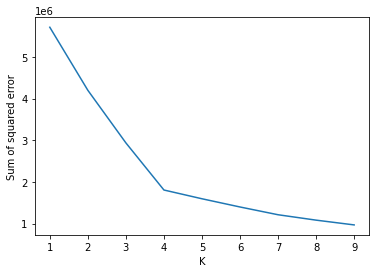

In [ ]:

import matplotlib.pyplot as plt
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
kmeans = KMeans(n_clusters=4)
data['kmeans']= ((kmeans.fit_predict(xx)))

In [ ]:
data.subreddit=pd.Categorical(data.subreddit)

In [ ]:
data['lenght']=data['postags'].apply(lambda x:len(x))
 

Truncated SVM and Logistic Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
X=data[['Subjectivity','Polarity','lenght','kmeans']].join(pd.DataFrame(pos), how='outer')
X = StandardScaler().fit_transform(X)
y=data['label']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model as lm
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,precision_score
import random

In [ ]:
Kfold=[0.10,0.40,0.50,0.80]
score=[]
for i in Kfold:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=3)

  svd = TruncatedSVD(algorithm="randomized", random_state=None, tol=0.0)
  scl = StandardScaler()
  lr = lm.LogisticRegression(class_weight="balanced", tol = 0.0001)
  clf = pipeline.Pipeline([('svd', svd),
    						 ('scl', scl),
                    	     ('lr', lr)])

  param_grid = {'svd__n_components' : [5,10,16],
                 'svd__n_iter':[3,4,5],
                 'lr__C': [10,14,15],
                  'lr__penalty':["l1","l2"]}

  f_scorer = metrics.make_scorer(f1_score, greater_is_better = True)

  model = GridSearchCV(estimator = clf, param_grid=param_grid, scoring=f_scorer,
                                     verbose=10, n_jobs=-1, iid=True, refit=True, cv=10)



  model.fit(X_train, y_train)
  print('test size',i)
  print("Best score: %0.3f" % model.best_score_)

  print("Best parameters set:")
  best_parameters = model.best_estimator_.get_params()
  for param_name in sorted(param_grid.keys()):
  	print("\t%s: %r" % (param_name, best_parameters[param_name]))
  zzz=[model.best_score_,i,param_name,best_parameters[param_name]]
  score.append(zzz)






Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6

test size 0.1
Best score: 0.541
Best parameters set:
	lr__C: 10
	lr__penalty: 'l2'
	svd__n_components: 16
	svd__n_iter: 3
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

test size 0.4
Best score: 0.540
Best parameters set:
	lr__C: 10
	lr__penalty: 'l2'
	svd__n_components: 16
	svd__n_iter: 3
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

test size 0.5
Best score: 0.541
Best parameters set:
	lr__C: 10
	lr__penalty: 'l2'
	svd__n_components: 16
	svd__n_iter: 3
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

test size 0.8
Best score: 0.541
Best parameters set:
	lr__C: 10
	lr__penalty: 'l2'
	svd__n_components: 16
	svd__n_iter: 3


In [ ]:
score

[[0.5407671787719966, 0.1, 'svd__n_iter', 3],
 [0.5404803638677395, 0.4, 'svd__n_iter', 3],
 [0.540730363352006, 0.5, 'svd__n_iter', 3],
 [0.5406044461778607, 0.8, 'svd__n_iter', 3]]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=3)

svd = TruncatedSVD(algorithm="randomized", random_state=None, tol=0.0)
scl = StandardScaler()
lr = lm.LogisticRegression(class_weight="balanced", tol = 0.0001)
clf = pipeline.Pipeline([('svd', svd),
    						 ('scl', scl),
                    	     ('lr', lr)])

param_grid = {'svd__n_components' : [16],
                 'svd__n_iter':[3],
                 'lr__C': [10],
                  'lr__penalty':["l2"]}

f_scorer = metrics.make_scorer(f1_score, greater_is_better = True)

model = GridSearchCV(estimator = clf, param_grid=param_grid, scoring=f_scorer,
                                     verbose=10, n_jobs=-1, iid=True, refit=True, cv=10)

model.fit(X_train, y_train)
preds = model.predict(X_test)


 


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.0s finished


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds)
print(confusion_matrix)

[[109391  92295]
 [ 93336 109309]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54    201686
           1       0.54      0.54      0.54    202645

    accuracy                           0.54    404331
   macro avg       0.54      0.54      0.54    404331
weighted avg       0.54      0.54      0.54    404331



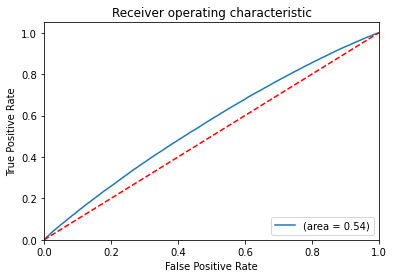

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(y_test,preds)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
probilities=data[['parent_comment']].join(pd.DataFrame(model.predict_proba(X)))
probilities

,parent_comment,0,1
0,"Yeah, I get that argument. At this point, I'd ...",0.593560,0.406440
1,The blazers and Mavericks (The wests 5 and 6 s...,0.514824,0.485176
2,They're favored to win.,0.644692,0.355308
3,deadass don't kill my buzz,0.598512,0.401488
4,Yep can confirm I saw the tool they use for th...,0.614171,0.385829
...,...,...,...
1010821,"No one is calling this an engineered pathogen,...",0.391219,0.608781
1010822,In a move typical of their recent do-nothing a...,0.389055,0.610945
1010823,Screw the Disabled--I've got to get to Church ...,0.466981,0.533019
1010824,I've always been unsettled by that. I hear a l...,0.435459,0.564541


Google BERT-Text Embedding and 1d Covnets





In [ ]:
%reset -f


In [ ]:
import pandas as pd
data=pd.read_csv('data.csv')

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

     |████████████████████████████████| 133kB 17.8MB/s 
     |████████████████████████████████| 92kB 11.2MB/s 
     |████████████████████████████████| 133kB 46.7MB/s 
     |████████████████████████████████| 7.5MB 46.2MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
ERROR: botocore 1.20.67 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


'Tesla T4'

In [ ]:
!pip install -q bert-for-tf2
!pip install -q sentencepiece

     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 1.2MB 20.6MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
def tokenize(text):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text))

In [ ]:
!pip install -q swifter
import swifter

     |████████████████████████████████| 634kB 18.7MB/s 
     |████████████████████████████████| 296kB 52.2MB/s 
     |████████████████████████████████| 583kB 59.9MB/s 
     |████████████████████████████████| 112kB 62.0MB/s 
     |████████████████████████████████| 48.5MB 63kB/s 
     |████████████████████████████████| 17.2MB 214kB/s 
     |████████████████████████████████| 81kB 14.1MB/s 
     |████████████████████████████████| 133kB 53.4MB/s 
     |████████████████████████████████| 204kB 64.6MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 3.1MB 51.9MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 1.3MB 48.5MB/s 
     |████████████████████████████████| 92kB 13.0MB/s 
     |████████████████████████████████| 296kB 62.0MB/s 
     |████████████████████████████████| 143kB 60.8MB/s 
ERROR: modin 0.9.1 has requirement pandas==1.2.3, but you'll have pandas 1.1.5 which is incompatible.


In [ ]:
data['tokenize']=data['parent_comment'].swifter.apply(lambda x:tokenize(x))

In [ ]:
tokenize=data['tokenize']

In [ ]:
sequence = [[comment, data.label[i], len(comment)]
                 for i, comment in enumerate(tokenize)]

In [ ]:
import random
random.shuffle(sequence)


In [ ]:
sequence.sort(key=lambda x: x[2])
sorted_seq = [(comm[0], comm[1]) for comm in sequence]

In [ ]:
df = tf.data.Dataset.from_generator(lambda: sorted_seq, output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
batched_dataset = df.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [ ]:
import math

In [ ]:
TOTAL_BATCHES = math.ceil(len(sorted_seq) / BATCH_SIZE)
batched_dataset.shuffle(TOTAL_BATCHES)

<ShuffleDataset shapes: ((None, None), (None,)), types: (tf.int32, tf.int32)>

In [ ]:
TOTAL_BATCHES

31589

In [ ]:
train_data = batched_dataset.skip(10000)
test_data = batched_dataset.skip(21589)

In [ ]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

Hyperparameters

In [ ]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 5

In [ ]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [ ]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [ ]:
text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
21589/21589 [==============================] - 1430s 63ms/step - loss: 0.6769 - accuracy: 0.5701
Epoch 2/5
21589/21589 [==============================] - 1276s 58ms/step - loss: 0.6575 - accuracy: 0.6061
Epoch 3/5
21589/21589 [==============================] - 1292s 58ms/step - loss: 0.6075 - accuracy: 0.6616
Epoch 4/5
21589/21589 [==============================] - 1315s 59ms/step - loss: 0.5307 - accuracy: 0.7215
Epoch 5/5
21589/21589 [==============================] - 1318s 59ms/step - loss: 0.4490 - accuracy: 0.7710


In [ ]:
results = text_model.evaluate(test_data)
print(results)

10000/10000 [==============================] - 147s 8ms/step - loss: 0.3741 - accuracy: 0.8377
[0.3740980327129364, 0.8377419710159302]


In [ ]:
results1=text_model.predict(test_data)

In [ ]:
results1

array([[0.65424275],
       [0.5288436 ],
       [0.2602486 ],
       ...,
       [0.00238845],
       [0.51099473],
       [0.00094974]], dtype=float32)

In [ ]:
import numpy as np
predicted = (results1 > 0.5).astype(np.int)
print(labels)

[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [1]]


In [ ]:
true_categories = tf.concat([y for x, y in test_data], axis=0)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_categories, predicted)


array([[130376,  28813],
       [ 23106, 137683]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predicted, true_categories))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83    153482
           1       0.86      0.83      0.84    166496

    accuracy                           0.84    319978
   macro avg       0.84      0.84      0.84    319978
weighted avg       0.84      0.84      0.84    319978



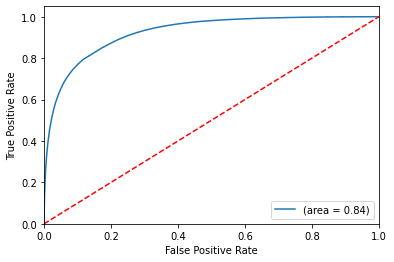

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
logit_roc_auc = roc_auc_score(true_categories,predicted)
fpr, tpr, thresholds = roc_curve(true_categories, results1)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()